# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [4]:
pip install citipy

Note: you may need to restart the kernel to use updated packages.


In [163]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import json
import requests
from pathlib import Path
from pprint import pprint
import time
import seaborn as sns
units = "metric"
from api_keys import geoapify_key
from scipy.stats import linregress


# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy


### Generate the Cities List by Using the `citipy` Library

In [6]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 576


## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [45]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}appid={weather_api_key}&q={city}&units={units}"

    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_name = city_weather['name']
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city,
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass

    # pause to avoid rate limiting
    time.sleep(1)

# Indicate that Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")


# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)



Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | parksville
Processing Record 2 of Set 1 | utrik
Processing Record 3 of Set 1 | kerikeri
Processing Record 4 of Set 1 | puerto ayora
Processing Record 5 of Set 1 | badger
Processing Record 6 of Set 1 | plouzane
Processing Record 7 of Set 1 | talnakh
Processing Record 8 of Set 1 | puerto ayora
Processing Record 9 of Set 1 | pitimbu
Processing Record 10 of Set 1 | kodiak
Processing Record 11 of Set 1 | freetown
Processing Record 12 of Set 1 | yakeshi
Processing Record 13 of Set 1 | waitangi
Processing Record 14 of Set 1 | adamstown
Processing Record 15 of Set 1 | rodez
Processing Record 16 of Set 1 | albany
Processing Record 17 of Set 1 | broome
Processing Record 18 of Set 1 | bilibino
Processing Record 19 of Set 1 | tura
Processing Record 20 of Set 1 | namibe
Processing Record 21 of Set 1 | toga village
City not found. Skipping...
Processing Record 22 of Set 1 | yellowknife
Processing Record 23 of 

In [46]:
# Check the DataFrame
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,parksville,49.3163,-124.3195,10.80,99,100,11.32,CA,1731293734
1,utrik,11.2278,169.8474,28.53,76,3,8.76,MH,1731293735
2,kerikeri,-35.2268,173.9474,15.42,98,100,1.59,NZ,1731293654
3,puerto ayora,-0.7393,-90.3518,21.42,87,88,2.24,EC,1731293017
4,badger,64.8000,-147.5333,-17.05,84,0,2.06,US,1731293712


In [49]:
# Convert the date to a datetime object
city_data_df['Date'] = pd.to_datetime(city_data_df['Date'], unit='s')

In [50]:
# save the DataFrame to a CSV file
city_data_df.to_csv('city_weather_data.csv', index_label="City_ID")

In [51]:
# Read saved data
city_data_df = pd.read_csv('city_weather_data.csv', index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,parksville,49.3163,-124.3195,10.80,99,100,11.32,CA,2024-11-11 02:55:34
1,utrik,11.2278,169.8474,28.53,76,3,8.76,MH,2024-11-11 02:55:35
2,kerikeri,-35.2268,173.9474,15.42,98,100,1.59,NZ,2024-11-11 02:54:14
3,puerto ayora,-0.7393,-90.3518,21.42,87,88,2.24,EC,2024-11-11 02:43:37
4,badger,64.8000,-147.5333,-17.05,84,0,2.06,US,2024-11-11 02:55:12


#### Latitude Vs. Temperature

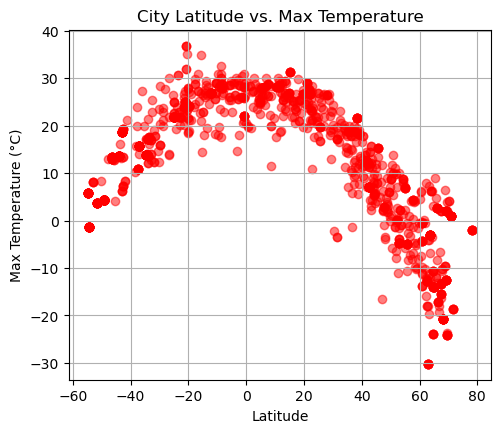

In [157]:
# Set up the plots
plt.figure(figsize=(12, 10))

# Latitude vs. Max Temperature
plt.subplot(2, 2, 1)
plt.scatter(city_data_df['Lat'], city_data_df['Max Temp'], color='red', alpha=0.5)
plt.title('City Latitude vs. Max Temperature')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (°C)')

# Save the figure
plt.savefig("Fig1.png")

# Show plot
plt.grid()
plt.show()

#### Latitude Vs. Humidity

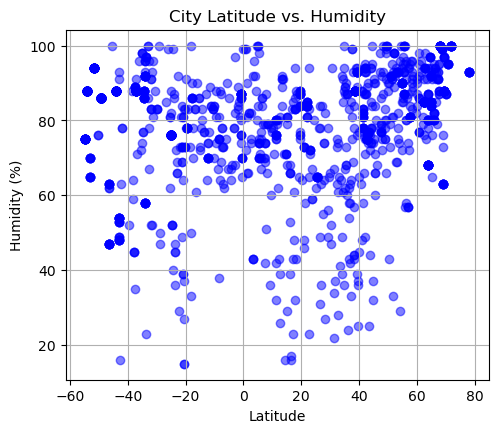

In [73]:
# Set up the plots
plt.figure(figsize=(12, 10))

# Latitude vs. Humidity
plt.subplot(2, 2, 2)
plt.scatter(city_data_df['Lat'], city_data_df['Humidity'], color='blue', alpha=0.5)
plt.title('City Latitude vs. Humidity')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')

# Save the figure
plt.savefig("Fig2.png")

# Show plot
plt.grid()
plt.show()

#### Latitude Vs. Cloudiness

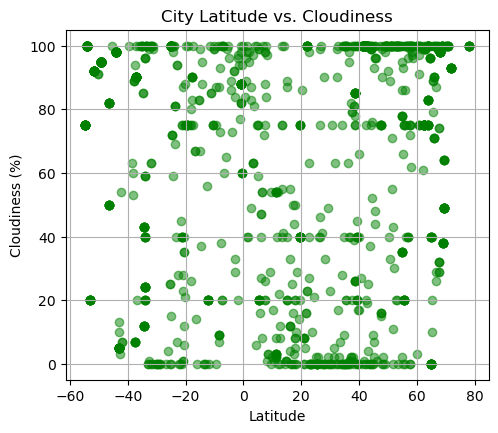

In [72]:
# Set up the plots
plt.figure(figsize=(12, 10))

# Latitude vs. Cloudiness
plt.subplot(2, 2, 3)
plt.scatter(city_data_df['Lat'], city_data_df['Cloudiness'], color='green', alpha=0.5)
plt.title('City Latitude vs. Cloudiness')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')

# Save the figure
plt.savefig("Fig3.png")

# Show plot
plt.grid()
plt.show()


#### Latitude vs. Wind Speed Plot

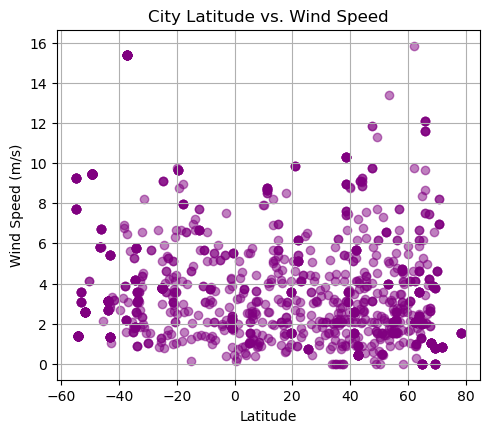

In [71]:
# Set up the plots
plt.figure(figsize=(12, 10))

# Latitude vs. Wind Speed
plt.subplot(2,2,4)
plt.scatter(city_data_df['Lat'], city_data_df['Wind Speed'], color='purple', alpha=0.5)
plt.title('City Latitude vs. Wind Speed')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (m/s)')

# Save the figure
plt.savefig("Fig4.png")

# Show plot
plt.grid()
plt.show()


---

## Requirement 2: Compute Linear Regression for Each Relationship


In [165]:
# Function to create scatter plots with linear regression
def create_regression_plot(x, y, x_label, y_label, title):
    # Calculate linear regression
    slope, intercept, r_value, p_value, std_err = linregress(x, y)
    line_eq = slope * x + intercept
    
    # Create scatter plot
    plt.scatter(x, y, color='blue', alpha=0.5)
    plt.plot(x, line_eq, color='red')
    
    # Annotate the plot with the line equation and r^2 value
    plt.title(title)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.annotate(f'y = {slope:.2f}x + {intercept:.2f}\nR² = {r_value**2:.2f}', 
                 xy=(0.1, 0.9), xycoords='axes fraction', fontsize=12, color='red')

In [167]:
# Separate data into Northern and Southern Hemisphere
northern_hemisphere = city_data_df[city_data_df['Lat'] >= 0]
southern_hemisphere = city_data_df[city_data_df['Lat'] < 0]

In [168]:
northern_hemisphere.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
1,Iqaluit,63.7506,-68.5145,-3.15,63,75,4.12,CA,1731286804
2,Tazovsky,67.4667,78.7000,-13.47,93,100,7.63,RU,1731286804
3,Lā‘ie,21.6477,-157.9253,27.81,80,15,3.13,US,1731286804
6,Beaufort,5.3473,115.7455,27.89,81,100,0.64,MY,1731286804
7,Margate,51.3813,1.3862,11.04,89,26,0.89,GB,1731286804


In [169]:
southern_hemisphere.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Adamstown,-25.0660,-130.1015,21.87,74,100,4.37,PN,1731286804
4,San Ignacio de Velasco,-16.3667,-60.9500,25.17,69,16,1.88,BO,1731286804
5,Waitangi,-43.9535,-176.5597,13.52,94,100,7.71,NZ,1731286804
9,Arraial do Cabo,-22.9661,-42.0278,21.92,94,40,0.00,BR,1731286805
10,Blackmans Bay,-43.0167,147.3167,18.62,51,4,1.34,AU,1731286805


###  Temperature vs. Latitude Linear Regression Plot

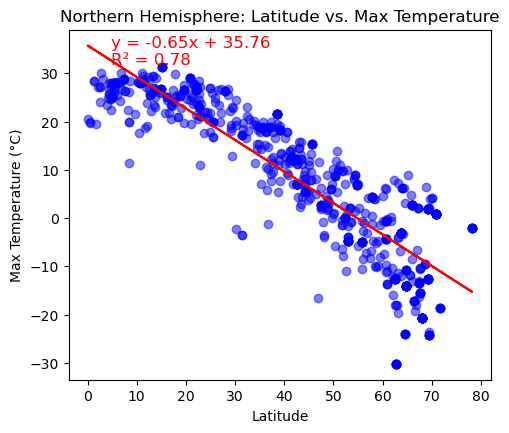

In [170]:
# Set up the plots
plt.figure(figsize=(12, 10))

# Northern Hemisphere: Max Temperature vs. Latitude
plt.subplot(2, 2, 1)
create_regression_plot(northern_hemisphere['Lat'], northern_hemisphere['Max Temp'], 
                       'Latitude', 'Max Temperature (°C)', 
                       'Northern Hemisphere: Latitude vs. Max Temperature')

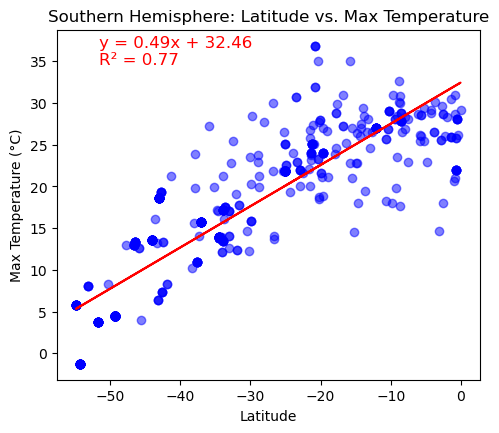

In [171]:
# Set up the plots
plt.figure(figsize=(12, 10))

# Southern Hemisphere: Max Temperature vs. Latitude
plt.subplot(2, 2, 3)
create_regression_plot(southern_hemisphere['Lat'], southern_hemisphere['Max Temp'], 
                       'Latitude', 'Max Temperature (°C)', 
                       'Southern Hemisphere: Latitude vs. Max Temperature')

### Humidity vs. Latitude Linear Regression Plot

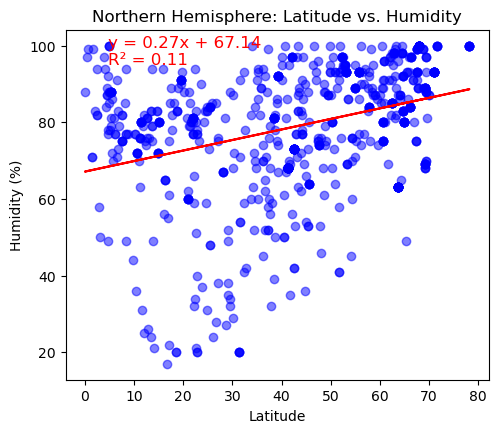

In [172]:
# Set up the plots
plt.figure(figsize=(12, 10))

# Northern Hemisphere: Humidity vs. Latitude
plt.subplot(2, 2, 2)
create_regression_plot(northern_hemisphere['Lat'], northern_hemisphere['Humidity'], 
                       'Latitude', 'Humidity (%)', 
                       'Northern Hemisphere: Latitude vs. Humidity')

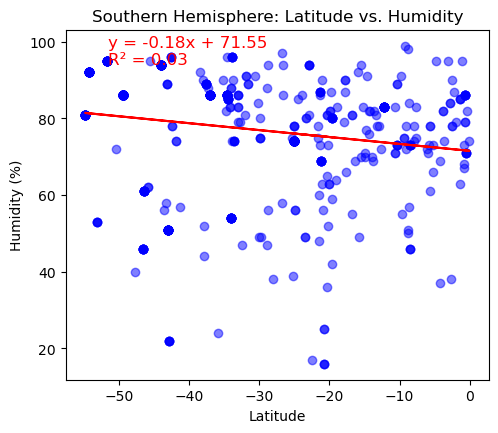

In [173]:
# Set up the plots
plt.figure(figsize=(12, 10))

# Southern Hemisphere: Humidity vs. Latitude
plt.subplot(2, 2, 4)
create_regression_plot(southern_hemisphere['Lat'], southern_hemisphere['Humidity'], 
                       'Latitude', 'Humidity (%)', 
                       'Southern Hemisphere: Latitude vs. Humidity')

### Cloudiness vs. Latitude Linear Regression Plot

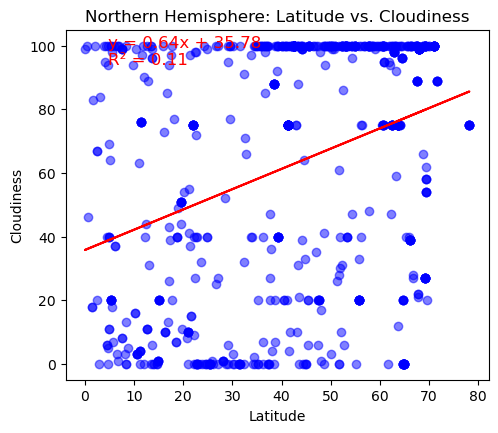

In [176]:
# Set up the plots
plt.figure(figsize=(12, 10))

# Northern Hemisphere: Cloudiness vs. Latitude
plt.subplot(2, 2, 2)
create_regression_plot(northern_hemisphere['Lat'], northern_hemisphere['Cloudiness'], 
                       'Latitude', 'Cloudiness', 
                       'Northern Hemisphere: Latitude vs. Cloudiness')

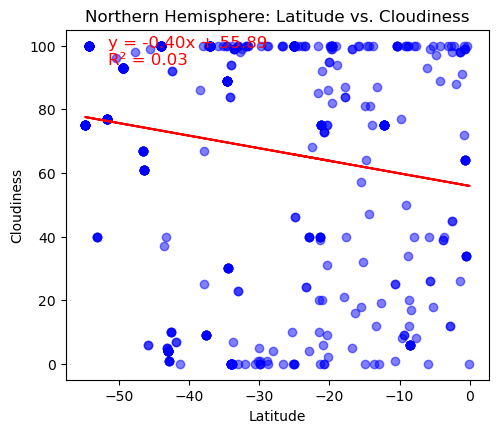

In [177]:
# Set up the plots
plt.figure(figsize=(12, 10))

# Southern Hemisphere: Cloudiness vs. Latitude
plt.subplot(2, 2, 2)
create_regression_plot(southern_hemisphere['Lat'], southern_hemisphere['Cloudiness'], 
                       'Latitude', 'Cloudiness', 
                       'Northern Hemisphere: Latitude vs. Cloudiness')

### Wind Speed vs. Latitude Linear Regression Plot

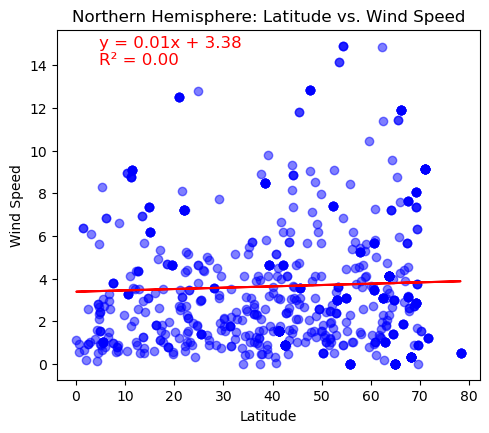

In [178]:
# Set up the plots
plt.figure(figsize=(12, 10))

# Northern Hemisphere: Latitude vs. Wind Speed
plt.subplot(2, 2, 2)
create_regression_plot(northern_hemisphere['Lat'], northern_hemisphere['Wind Speed'], 
                       'Latitude', 'Wind Speed', 
                       'Northern Hemisphere: Latitude vs. Wind Speed')

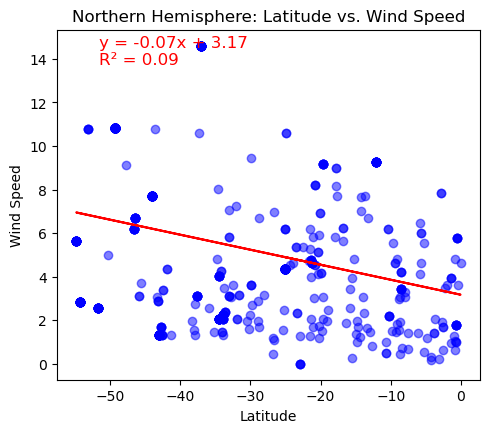

In [182]:
# Set up the plots
plt.figure(figsize=(12, 10))

# Southern Hemisphere: Latitude vs. Wind Speed
plt.subplot(2, 2, 2)
create_regression_plot(southern_hemisphere['Lat'], southern_hemisphere['Wind Speed'], 
                       'Latitude', 'Wind Speed', 
                       'Northern Hemisphere: Latitude vs. Wind Speed')